In [1]:
!pip install geopy
! pip install folium==0.5.0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 9.1 MB/s  eta 0:00:01
  Created wheel for folium: file

In [2]:
import numpy as np # library to handle data in a vectorized manner
from bs4 import BeautifulSoup

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [5]:
# Parameters for plotting:

%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)
fig_fc = '#ffffff'
pc = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
      "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
      "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]

def plot_conf(ax, xlbl='', ylbl='', t=''):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    ax.grid(True, color='#e9e9e9')
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');
    
# table configuration
styles = [
    dict(selector="td, th", props=[("border", "1px solid #333"), ("padding", "2px")]),
    dict(selector="th.col_heading", props=[("background", "#eee8d5"), ("color", "#b58900"), ("padding", "5px 8px")]),
    dict(selector="th.index_name", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "5px 8px")]),
    dict(selector="th.blank", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "0")]),
    dict(selector="th.row_heading.level0", props=[("background", "rgba(133, 153, 0, 0.1)")]),
    dict(selector="th.row_heading.level1", props=[("background", "rgba(42, 161, 152, 0.1)")]),
    dict(selector="thead tr:nth-child(2) th", props=[("border-bottom", "3px solid #333333")]),
    dict(selector="td:hover", props=[("font-weight", "bold"), ("background", "#002b36"), ("color", "Gold")]),
]

disp_fmt = "<h2 style='color: #b58900'>{}<span style='color: #FF91CE; font-size: 115%'>:</span></h2>"

Download the New York City JSON file

In [3]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [6]:
ny_data = newyork_data['features']
ny_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_neighborhoods = pd.DataFrame(columns=column_names)

for data in ny_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                                  'Neighborhood': neighborhood_name,
                                                  'Latitude': neighborhood_lat,
                                                  'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
ny_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ny_neighborhoods['Borough'].unique()),
        ny_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [10]:
nnvc = ny_neighborhoods['Neighborhood'].value_counts()
nnvc[nnvc > 1]

Sunnyside      2
Murray Hill    2
Bay Terrace    2
Chelsea        2
Name: Neighborhood, dtype: int64

In [11]:
ny_neighborhoods[ny_neighborhoods['Neighborhood'] == 'Wakefield']

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201


In [12]:
for i in range(ny_neighborhoods.shape[0]):
    nyn_ = ny_neighborhoods.loc[i, 'Neighborhood']
    if ny_neighborhoods[ny_neighborhoods['Neighborhood'] == nyn_].shape[0] > 1:
        ind_ = ny_neighborhoods[ny_neighborhoods['Neighborhood'] == nyn_].index.tolist()
        for j in ind_:
            nyb__ = ny_neighborhoods.loc[j, 'Borough']
            ny_neighborhoods.loc[j, 'Neighborhood'] = nyn_ + ', ' + nyb__

In [13]:
ny_neighborhoods[ny_neighborhoods['Neighborhood'].str.startswith('Bay Terrace')]

,Borough,Neighborhood,Latitude,Longitude
175,Queens,"Bay Terrace, Queens",40.782843,-73.776802
235,Staten Island,"Bay Terrace, Staten Island",40.553988,-74.139166


In [14]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [15]:

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10, 
                         min_zoom=9, max_zoom=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_neighborhoods['Latitude'], 
                                           ny_neighborhoods['Longitude'], 
                                           ny_neighborhoods['Borough'], 
                                           ny_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        weight=2,
        color='#333333',
        fill=True,
        fill_color='#ffb300',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [16]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'CBQGAZEG4YKYUPJWU3RS21W3HJCIKROZQPSLMZLMTDR0V1S5' # your Foursquare ID
CLIENT_SECRET = 'JZSAX1WX4CMNMGR0V4F25XGX1MCYCH1KUTFYQJKEYKF3BVTY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CBQGAZEG4YKYUPJWU3RS21W3HJCIKROZQPSLMZLMTDR0V1S5
CLIENT_SECRET:JZSAX1WX4CMNMGR0V4F25XGX1MCYCH1KUTFYQJKEYKF3BVTY


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print('•', end='')
            
        # create the API request URL
        url = ('https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}'
               '&v={}&ll={},{}&intent=browse&radius={}&limit={}'
               .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT))
            
        # make the GET request
        results = None
        while results is None:
            try:
                results = requests.get(url).json()["response"]["venues"]
            except:
                print('X', end='')
                results = None
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['name'], v['location']['lat'], 
                             v['location']['lng'], v['categories'][0]['name']) 
                            for v in results if len(v['categories']) > 0])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [18]:

nyc_venues = getNearbyVenues(names=ny_neighborhoods['Neighborhood'],
                             latitudes=ny_neighborhoods['Latitude'],
                             longitudes=ny_neighborhoods['Longitude']
                            )

••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••

In [19]:
# Remove records that is not not of interest such as buildings or offices
nyc_venues = nyc_venues[~nyc_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line', 'Bus Station', 'Bus Stop', 'Road'])]
print(nyc_venues.shape)
nyc_venues.head()

(23522, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Shell,40.891771,-73.853213,Gas Station
1,Wakefield,40.894705,-73.847201,Pitman Deli,40.896744,-73.844398,Food
2,Wakefield,40.894705,-73.847201,Julio C Barber Shop 2,40.892648,-73.855725,Salon / Barbershop
3,Wakefield,40.894705,-73.847201,Citibank,40.894161,-73.845825,Bank
4,Wakefield,40.894705,-73.847201,Edenwald Liquors,40.890942,-73.850455,Liquor Store


In [20]:
nyc_venues.groupby('Neighborhood').size()

Neighborhood
Allerton                      83
Annadale                      74
Arden Heights                 66
Arlington                     68
Arrochar                      77
Arverne                       83
Astoria                       69
Astoria Heights               63
Auburndale                    60
Bath Beach                    83
Battery Park City             87
Bay Ridge                     83
Bay Terrace, Queens           82
Bay Terrace, Staten Island    76
Baychester                    80
Bayside                       84
Bayswater                     80
Bedford Park                  73
Bedford Stuyvesant            84
Beechhurst                    88
Bellaire                      79
Belle Harbor                  82
Bellerose                     79
Belmont                       53
Bensonhurst                   83
Bergen Beach                  77
Blissville                    78
Bloomfield                    73
Boerum Hill                   87
Borough Park                  

In [22]:
ny_neighborhoods.shape[0], nyc_venues['Neighborhood'].unique().shape[0]

(306, 306)

In [23]:
nyc_excluded_neighborhoods = set(ny_neighborhoods['Neighborhood']).difference(nyc_venues['Neighborhood'])
nyc_excluded_neighborhoods

set()

In [24]:

print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 577 uniques categories.


In [25]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

nyc_onehot['Neighborhood_'] = nyc_venues['Neighborhood'] 

fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

,Neighborhood_,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Service,Airport Terminal,Airport Tram,Alternative Healer,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Baggage Claim,Baggage Locker,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Burger Joint,Burrito Place,Business Center,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campaign Office,Campground,Canal,Candy Store,Cantonese Restaurant,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Caucasian Restaurant,Cemetery,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Church,Circus,City Hall,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Classroom,College Communications Building,College Football Field,College Gym,College History Building,College Lab,College Library,College Math Building,College Quad,College Rec Center,College Residence Hall,College Science Building,College Soccer Field,College Stadium,College Technology Building,College Theater,College Track,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Community College,Concert Hall,Conference Room,Construction & Landscaping,Convenience Store,Convention Center,Cooking School,Corporate Amenity,Corporate Cafeteria,Cosmetics Shop,Costume Shop,Country Dance Club,Courthouse,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Driving School,Drugstore,Dry Cleaner,Dumpling Restaurant,EV Charging Station,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,Emergency Room,Empanada Restaurant,Entertainment Service,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fire Station,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Funeral Home,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hospice,Hospital,Hospital Ward,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar

In [36]:
ny_grouped = nyc_onehot.groupby('Neighborhood_').mean().reset_index()
ny_grouped.head()

,Neighborhood_,ATM,Accessories Store,Acupuncturist,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Service,Airport Terminal,Airport Tram,Alternative Healer,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Baggage Claim,Baggage Locker,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Burger Joint,Burrito Place,Business Center,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campaign Office,Campground,Canal,Candy Store,Cantonese Restaurant,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Caucasian Restaurant,Cemetery,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Church,Circus,City Hall,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Classroom,College Communications Building,College Football Field,College Gym,College History Building,College Lab,College Library,College Math Building,College Quad,College Rec Center,College Residence Hall,College Science Building,College Soccer Field,College Stadium,College Technology Building,College Theater,College Track,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Community College,Concert Hall,Conference Room,Construction & Landscaping,Convenience Store,Convention Center,Cooking School,Corporate Amenity,Corporate Cafeteria,Cosmetics Shop,Costume Shop,Country Dance Club,Courthouse,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Driving School,Drugstore,Dry Cleaner,Dumpling Restaurant,EV Charging Station,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,Emergency Room,Empanada Restaurant,Entertainment Service,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fire Station,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Funeral Home,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hospice,Hospital,Hospital Ward,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar

In [37]:
def return_most_common_venues(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]


num_top_cat = 7
indicators = ['st', 'nd', 'rd']

In [38]:
# create columns according to number of top venues
columns = ['Neighborhood_']
for ind in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
ny_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
ny_neighborhoods_categories_sorted['Neighborhood_'] = nyc_grouped['Neighborhood_']

for ind in np.arange(nyc_grouped.shape[0]):
    ny_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        ny_grouped.iloc[ind, :], num_top_cat)

ny_neighborhoods_categories_sorted.head()

,Neighborhood_,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category
0,Allerton,Laundry Service,Salon / Barbershop,Doctor's Office,Pharmacy,Food,Chiropractor,Automotive Shop
1,Annadale,Salon / Barbershop,Tattoo Parlor,Nail Salon,Gas Station,Pizza Place,Veterinarian,General Entertainment
2,Arden Heights,Dentist's Office,Salon / Barbershop,Bridge,Moving Target,Gym,Food,Doctor's Office
3,Arlington,Church,Hardware Store,Residential Building (Apartment / Condo),Automotive Shop,Laundry Service,American Restaurant,Salon / Barbershop
4,Arrochar,Deli / Bodega,Pizza Place,Food Truck,Laundry Service,Beach,Chinese Restaurant,Food


In [39]:
# set number of clusters
kclusters = 5

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 1, 3, 1, 1, 2, 1, 0, 1], dtype=int32)

In [40]:
# add clustering labels
ny_neighborhoods_categories_sorted.insert(0, 'Cluster Labels2', kmeans.labels_)

nyc_merged = ny_neighborhoods.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
nyc_merged = nyc_merged[~nyc_merged['Neighborhood_'].isin(nyc_excluded_neighborhoods)]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(ny_neighborhoods_categories_sorted.set_index('Neighborhood_'), on='Neighborhood_')

nyc_merged.head() # check the last columns!

,Borough,Neighborhood_,Latitude,Longitude,Cluster Labels2,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category
0,Bronx,Wakefield,40.894705,-73.847201,3,Salon / Barbershop,Church,Laundry Service,Doctor's Office,Coworking Space,Candy Store,Food
1,Bronx,Co-op City,40.874294,-73.829939,1,School,Residential Building (Apartment / Condo),Church,Dentist's Office,Doctor's Office,Supermarket,Metro Station
2,Bronx,Eastchester,40.887556,-73.827806,0,Automotive Shop,Caribbean Restaurant,Deli / Bodega,Church,Gas Station,Bridge,Hardware Store
3,Bronx,Fieldston,40.895437,-73.905643,1,College Academic Building,College Administrative Building,Synagogue,College Residence Hall,Residential Building (Apartment / Condo),College Cafeteria,Church
4,Bronx,Riverdale,40.890834,-73.912585,2,Residential Building (Apartment / Condo),Synagogue,Doctor's Office,Park,Dentist's Office,Playground,Dog Run


In [42]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood_'], nyc_merged['Cluster Labels2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
nyc_merged.loc[nyc_merged['Cluster Labels2'] == 0, 
               nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood_,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category
2,Eastchester,Automotive Shop,Caribbean Restaurant,Deli / Bodega,Church,Gas Station,Bridge,Hardware Store
24,Hunts Point,Automotive Shop,Factory,Gas Station,Food,Mexican Restaurant,Coffee Shop,General Entertainment
152,Auburndale,Automotive Shop,Deli / Bodega,Train,Nail Salon,Residential Building (Apartment / Condo),Lawyer,Athletics & Sports
164,South Jamaica,Automotive Shop,Church,Salon / Barbershop,Laundry Service,Gas Station,Middle School,Non-Profit
205,Port Richmond,Automotive Shop,Deli / Bodega,Mexican Restaurant,Pizza Place,Laundry Service,Event Space,Italian Restaurant
269,Mount Eden,Automotive Shop,Pizza Place,Doctor's Office,Residential Building (Apartment / Condo),Bar,Church,Nightclub


In [45]:
nyc_merged.loc[nyc_merged['Cluster Labels2'] == 1, 
               nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighborhood_,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category
1,Co-op City,School,Residential Building (Apartment / Condo),Church,Dentist's Office,Doctor's Office,Supermarket,Metro Station
3,Fieldston,College Academic Building,College Administrative Building,Synagogue,College Residence Hall,Residential Building (Apartment / Condo),College Cafeteria,Church
5,Kingsbridge,Laundry Service,Bank,Ice Cream Shop,Park,Salon / Barbershop,Clothing Store,Asian Restaurant
10,Baychester,Gas Station,Automotive Shop,Chinese Restaurant,Donut Shop,Burger Joint,Bank,Fast Food Restaurant
12,City Island,Harbor / Marina,Residential Building (Apartment / Condo),Miscellaneous Shop,Park,Thrift / Vintage Store,Beach,Grocery Store
16,Fordham,Clothing Store,Doctor's Office,Shoe Store,Government Building,Bank,Deli / Bodega,Dentist's Office
18,West Farms,Automotive Shop,Doctor's Office,Donut Shop,Metro Station,School,Deli / Bodega,Chinese Restaurant
22,Port Morris,Factory,Residential Building (Apartment / Condo),Government Building,Bar,Automotive Shop,Hardware Store,Tattoo Parlor
23,Longwood,Train,Automotive Shop,Gas Station,Church,Pizza Place,Food,Police Station
27,Clason Point,Park,Housing Development,Lounge,Automotive Shop,Event Space,Pool,Salon / Barbershop


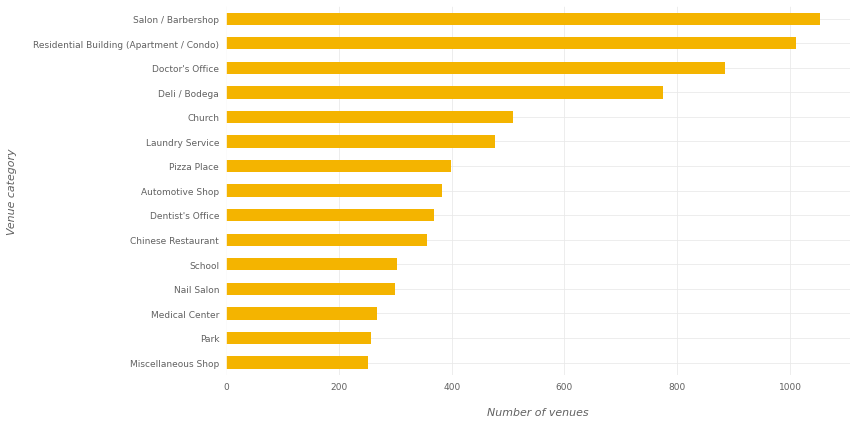

In [46]:
from matplotlib import pyplot as plt
fig_size = (12,6)
big_fig_size = (18,8)
fig_fc = '#ffffff'
pc = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
      "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
      "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]
def plot_conf(ax, xlbl='', ylbl='', t=''):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    ax.grid(True, color='#e9e9e9')
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');
    
# table configuration
styles = [
    dict(selector="td, th", props=[("border", "1px solid #333"), ("padding", "2px")]),
    dict(selector="th.col_heading", props=[("background", "#eee8d5"), ("color", "#b58900"), ("padding", "5px 8px")]),
    dict(selector="th.index_name", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "5px 8px")]),
    dict(selector="th.blank", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "0")]),
    dict(selector="th.row_heading.level0", props=[("background", "rgba(133, 153, 0, 0.1)")]),
    dict(selector="th.row_heading.level1", props=[("background", "rgba(42, 161, 152, 0.1)")]),
    dict(selector="thead tr:nth-child(2) th", props=[("border-bottom", "3px solid #333333")]),
    dict(selector="td:hover", props=[("font-weight", "bold"), ("background", "#002b36"), ("color", "Gold")]),
]

disp_fmt = "<h2 style='color: #b58900'>{}<span style='color: #FF91CE; font-size: 115%'>:</span></h2>"
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
nyc_top_vc = nyc_venues['Venue Category'].value_counts(normalize=False)
ax = nyc_top_vc.head(15).plot(kind='barh', color=pc[2]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-ven-nyc.png', dpi=300)

306 neighborhoods in NYC


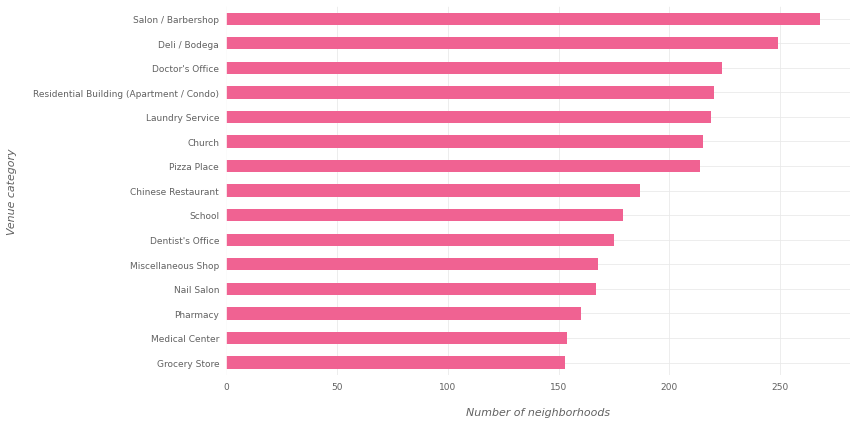

In [47]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
nyc_g = nyc_onehot.groupby('Neighborhood_').max().reset_index()
nyc_p = nyc_g.drop('Neighborhood_', axis=1).sum().sort_values(ascending=False)
print("{} neighborhoods in NYC".format(nyc_g.shape[0]))
ax = nyc_p.head(15).plot(kind='barh', color=pc[9]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of neighborhoods', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common2-ven-nyc.png', dpi=300)

In [48]:
nyc_bot_vc = nyc_venues['Venue Category'].value_counts(normalize=False)
nyc_bot_vc = nyc_bot_vc.tail(15).to_frame('Count')
nyc_bot_vc.index.names = ['Venue Category']
nyc_bot_vc

,Count
Venue Category,
Tibetan Restaurant,1
Industrial Estate,1
Cable Car,1
Gluten-free Restaurant,1
Circus,1
Airport,1
EV Charging Station,1
Public Bathroom,1
Indian Sweet Shop,1


Canada Data Set

In [ ]:
url='https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969'
response = requests.get(url)
#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html5lib')
wiki_table=soup.find('table')

In [ ]:
#develop dataframe
df = pd.read_html(str(wiki_table), flavor='html5lib')[0]
df.head()

In [ ]:
df=df[df['Borough']!='Not assigned']
df.head()

In [ ]:
temp_df=df.groupby('Postal Code')['Neighbourhood'].apply(lambda x: "%s" % ', '.join(x))
temp_df=temp_df.reset_index(drop=False)
temp_df.rename(columns={'Neighbourhood':'Neighborhood_joined'},inplace=True)

In [ ]:
df_merge = pd.merge(df, temp_df, on='Postal Code')
df_merge.drop(['Neighbourhood'],axis=1,inplace=True)
df_merge.drop_duplicates(inplace=True)
df_merge.rename(columns={'Neighborhood_joined':'Neighborhood'},inplace=True)
df_merge.head()

In [ ]:
geo_df=pd.read_csv('https://cocl.us/Geospatial_data')
geo_df.head()

In [ ]:
geo_df.rename(columns={'Postal Code':'Postal Code'},inplace=True)
geo_merged = pd.merge(geo_df, df_merge, on='Postal Code')
geo_data=geo_merged[['Postal Code','Borough','Neighborhood','Latitude','Longitude']]
geo_data.head()

In [ ]:
map_toronto = folium.Map(location=[43.65, -79.38], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(geo_data['Latitude'], geo_data['Longitude'], geo_data['Borough'], geo_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [ ]:
CLIENT_ID = 'CBQGAZEG4YKYUPJWU3RS21W3HJCIKROZQPSLMZLMTDR0V1S5' # your Foursquare ID
CLIENT_SECRET = 'JZSAX1WX4CMNMGR0V4F25XGX1MCYCH1KUTFYQJKEYKF3BVTY' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
tor_venues = getNearbyVenues(names=geo_data['Neighborhood'],
                             latitudes=geo_data['Latitude'],
                             longitudes=geo_data['Longitude']
                            )

In [ ]:
# Removing records where venue is "building" or "office"
tor_venues = tor_venues[~tor_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line', 'Bus Station', 'Bus Stop', 'Road'])]
print(tor_venues.shape)
tor_venues.head()

In [ ]:
# Let's check how many venues were returned for each neighborhood

tor_venues.groupby('Neighborhood').size()

In [ ]:
print('There are {} uniques categories.'.format(len(tor_venues['Venue Category'].unique())))

In [ ]:
# Perform one-hot encoding on the venue categories variable

# one hot encoding
tor_onehot = pd.get_dummies(tor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
# we used Neighborhood_" instead of just "Neighborhood" because
# there is a venue category called "Neighborhood"
tor_onehot['Neighborhood_'] = tor_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot.head()

In [ ]:
# Grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category for each neighborhood

tor_grouped = tor_onehot.groupby('Neighborhood_').mean().reset_index()
tor_grouped.head()

In [ ]:
# The most common categories for each neighborhood
def return_most_common_venues(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]


num_top_cat = 7
indicators = ['st', 'nd', 'rd']

In [ ]:
# create columns according to number of top venues
columns = ['Neighborhood_']
for ind in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
tor_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
tor_neighborhoods_categories_sorted['Neighborhood_'] = tor_grouped['Neighborhood_']

for ind in np.arange(tor_grouped.shape[0]):
    tor_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        tor_grouped.iloc[ind, :], num_top_cat)

tor_neighborhoods_categories_sorted.head()

Clustering - Now we apply K-means clustering on the dataframe stored in toronto_grouped variable which includes the relative frequency of each venue-category for each neighborhood.

In [ ]:
# set number of clusters
kclusters = 5

tor_grouped_clustering = tor_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

In [ ]:
# add clustering labels
tor_neighborhoods_categories_sorted.insert(0, 'Cluster_Labels2', kmeans.labels_)

tor_merged = geo_data.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
tor_merged = tor_merged[~tor_merged['Neighborhood_'].isin(geo_data)]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(tor_neighborhoods_categories_sorted.set_index('Neighborhood_'), on='Neighborhood_')

tor_merged.head() # check the last columns!

In [ ]:
map_clusters = folium.Map(location=[43.65, -79.38], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], tor_merged['Neighborhood_'], tor_merged['Cluster_Labels2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
tor_merged.loc[tor_merged['Cluster_Labels2'] == 0, 
               tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

In [ ]:
Cluster1 = tor_merged.loc[tor_merged['Cluster_Labels2'] == 0, tor_merged.columns[[1] + list(range(3, tor_merged.shape[1]))]]
Cluster1

In [ ]:
Cluster1['1st Most Common Category'].value_counts()

In [ ]:
Cluster2 = tor_merged.loc[tor_merged['Cluster_Labels2'] == 1, tor_merged.columns[[1] + list(range(3, tor_merged.shape[1]))]]
Cluster2

In [ ]:
Cluster2['1st Most Common Category'].value_counts()

In [ ]:
Cluster3 = tor_merged.loc[tor_merged['Cluster_Labels2'] == 2, tor_merged.columns[[1] + list(range(3, tor_merged.shape[1]))]]
Cluster3

In [ ]:
Cluster3['1st Most Common Category'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
tor_top_vc = tor_venues['Venue Category'].value_counts(normalize=False)
ax = tor_top_vc.head(15).plot(kind='barh', color=pc[5]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-ven-tor.png', dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
tor_g = tor_onehot.groupby('Neighborhood_').max().reset_index()
tor_p = tor_g.drop('Neighborhood_', axis=1).sum().sort_values(ascending=False)
print("{} neighborhoods in Toronto".format(tor_g.shape[0]))
ax = tor_p.head(15).plot(kind='barh', color=pc[13]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of neighborhoods', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common2-ven-tor.png', dpi=300)

In [ ]:
tor_bot_vc = tor_venues['Venue Category'].value_counts(normalize=False)
tor_bot_vc = tor_bot_vc.tail(15).to_frame('Count')
tor_bot_vc.index.names = ['Venue Category']
tor_bot_vc